In [192]:
# importing necessary libraries
import pandas as pd
import os
import json
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# setting max rows and columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [194]:
# checking contents of a folder
os.listdir('.')

['.ipynb_checkpoints',
 'Assessment.ipynb',
 'copy.json',
 'copy.txt',
 'transactions.json',
 'transactions.txt']

In [195]:
# open the data file and reading ot in to the JSON format with 'utf-8' encoding
file = open('transactions.json','r',encoding='utf-8')
transactions = []
for line in file.readlines():
    dic = json.loads(line)
    transactions.append(dic)
    
# print total number of transactions in a dataset
print (len(transactions))

786363


In [196]:
# converting the JSON dictonary in to the dataframe
df_transactions = pd.DataFrame(transactions)

In [197]:
# printing out the head of the Dataframe
df_transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [198]:
# checking number of columns in dataframe
df_transactions.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [199]:
# checking the column types and info in the dataframe
for i in df_transactions.columns:
    print ('%s = %s' %(i,(df_transactions[i].dtype)))
print ('\n #########################################')
df_transactions.describe()

accountNumber = object
customerId = object
creditLimit = float64
availableMoney = float64
transactionDateTime = object
transactionAmount = float64
merchantName = object
acqCountry = object
merchantCountryCode = object
posEntryMode = object
posConditionCode = object
merchantCategoryCode = object
currentExpDate = object
accountOpenDate = object
dateOfLastAddressChange = object
cardCVV = object
enteredCVV = object
cardLast4Digits = object
transactionType = object
echoBuffer = object
currentBalance = float64
merchantCity = object
merchantState = object
merchantZip = object
cardPresent = bool
posOnPremises = object
recurringAuthInd = object
expirationDateKeyInMatch = bool
isFraud = bool

 #########################################


,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


In [200]:
# changing column types in the transactions dataframe       ("posConditionCode": int , "posEntryMode": int)
df_transactions = df_transactions.astype({"accountNumber": int, 
                                          "customerId": int,
                                          "cardCVV": int,
                                          "enteredCVV": int,
                                          "cardLast4Digits": int})

In [211]:
# checking for number of unique values
for i in df_transactions.columns:
    print ('the number of unique values in   %s       is %d   and  dtype = %s' %(i,(len(df_transactions[i].unique())),(df_transactions[i].dtype)))

the number of unique values in   accountNumber       is 5000   and  dtype = int32
the number of unique values in   customerId       is 5000   and  dtype = int32
the number of unique values in   creditLimit       is 10   and  dtype = float64
the number of unique values in   availableMoney       is 521916   and  dtype = float64
the number of unique values in   transactionDateTime       is 776637   and  dtype = object
the number of unique values in   transactionAmount       is 66038   and  dtype = float64
the number of unique values in   merchantName       is 2490   and  dtype = object
the number of unique values in   acqCountry       is 5   and  dtype = object
the number of unique values in   merchantCountryCode       is 5   and  dtype = object
the number of unique values in   posEntryMode       is 6   and  dtype = object
the number of unique values in   posConditionCode       is 4   and  dtype = object
the number of unique values in   merchantCategoryCode       is 19   and  dtype = obje

##### columns with only one unique values can be dropped ad it will make no sense of adding them.

In [212]:
# checking if the account number and customer id columns are same
print (df_transactions['accountNumber'].equals(df_transactions['customerId']))

True


#### from the above result, we can examine that the number of rows returned are same, and hence we can conclude that the two columns are equal. 

In [213]:
df_transactions.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd','accountNumber'],axis=1,inplace = True)

In [214]:
# printing top 5 rows after dropping the columns
df_transactions.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [216]:
# checking for number of unique values
for i in df_transactions.columns:
    print ('the number of unique values in   %s       is %d   and  dtype = %s' %(i,(len(df_transactions[i].unique())),(df_transactions[i].dtype)))

the number of unique values in   customerId       is 5000   and  dtype = int32
the number of unique values in   creditLimit       is 10   and  dtype = float64
the number of unique values in   availableMoney       is 521916   and  dtype = float64
the number of unique values in   transactionDateTime       is 776637   and  dtype = object
the number of unique values in   transactionAmount       is 66038   and  dtype = float64
the number of unique values in   merchantName       is 2490   and  dtype = object
the number of unique values in   acqCountry       is 5   and  dtype = object
the number of unique values in   merchantCountryCode       is 5   and  dtype = object
the number of unique values in   posEntryMode       is 6   and  dtype = object
the number of unique values in   posConditionCode       is 4   and  dtype = object
the number of unique values in   merchantCategoryCode       is 19   and  dtype = object
the number of unique values in   currentExpDate       is 165   and  dtype = obj

In [217]:
# checking number of unique values with their respective value counts
col = ['creditLimit','acqCountry','posEntryMode','posConditionCode',
       'merchantCountryCode','transactionType','merchantCategoryCode',
       'cardPresent','expirationDateKeyInMatch','isFraud']
for col in col:
    print ('\n #########################################')
    print (col)
    l = df_transactions[col].unique() #creating a list of unique transactions in a columns 
    for i in l:
        print ('entry: %s = %d'%(i,(len(df_transactions[df_transactions[col] == i]))))


 #########################################
creditLimit
entry: 5000.0 = 201863
entry: 2500.0 = 75429
entry: 50000.0 = 48781
entry: 15000.0 = 139307
entry: 10000.0 = 56889
entry: 250.0 = 34025
entry: 500.0 = 27097
entry: 1000.0 = 36430
entry: 7500.0 = 97913
entry: 20000.0 = 68629

 #########################################
acqCountry
entry: US = 774709
entry:  = 4562
entry: CAN = 2424
entry: MEX = 3130
entry: PR = 1538

 #########################################
posEntryMode
entry: 02 = 195934
entry: 09 = 236481
entry: 05 = 315035
entry: 80 = 15283
entry: 90 = 19576
entry:  = 4054

 #########################################
posConditionCode
entry: 01 = 628787
entry: 08 = 149634
entry: 99 = 7533
entry:  = 409

 #########################################
merchantCountryCode
entry: US = 778511
entry: CAN = 2426
entry:  = 724
entry: PR = 1559
entry: MEX = 3143

 #########################################
transactionType
entry: PURCHASE = 745193
entry: ADDRESS_VERIFICATION = 20169
entry: REVER

In [218]:
# checking if missing values contribute to the fraud cases
for col in df_transactions.columns:
    # creating list of unique values in a column
    l = df_transactions[col].unique()
    if '' in l: # executing for loop if the column has a null('') value
        print (col) #print column  name
        print(df_transactions[df_transactions[col] == '']['isFraud'].value_counts()) # print number of counts fraud vs non fraud
        print('\n##################\n')

acqCountry
False    4413
True      149
Name: isFraud, dtype: int64

##################

merchantCountryCode
False    642
True      82
Name: isFraud, dtype: int64

##################

posEntryMode
False    3785
True      269
Name: isFraud, dtype: int64

##################

posConditionCode
False    387
True      22
Name: isFraud, dtype: int64

##################

transactionType
False    684
True      14
Name: isFraud, dtype: int64

##################



#### there are lot of missing values related to the fraud cases and hence we cant drop the columns with missing values

### Checking if the time data have relation with the fraud cases

In [219]:
#creating a sub dataframe
df_time = df_transactions[['customerId','transactionDateTime','accountOpenDate','dateOfLastAddressChange','isFraud']]

In [220]:
# checking for null values and '' in the dataframe
for i in df_time.columns:
    h = df_time[i].unique() #check unique values in the data frame
    if '' in h: #applying the condition to filter out the blank values
        print(True)
    else:
        print (False)
        
        
    print (df_time[i].isnull().sum())


False
0
False
0
False
0
False
0
False
0


In [221]:
# converting the columns in to date time
cols = ['transactionDateTime','accountOpenDate','dateOfLastAddressChange']
df_time[cols] = df_time[cols].apply(pd.to_datetime, errors='coerce')

In [222]:
df_time.dtypes

customerId                          int32
transactionDateTime        datetime64[ns]
accountOpenDate            datetime64[ns]
dateOfLastAddressChange    datetime64[ns]
isFraud                              bool
dtype: object

In [223]:
# printing top 5 rows
df_time.head()

,customerId,transactionDateTime,accountOpenDate,dateOfLastAddressChange,isFraud
0,737265056,2016-08-13 14:27:32,2015-03-14,2015-03-14,False
1,737265056,2016-10-11 05:05:54,2015-03-14,2015-03-14,False
2,737265056,2016-11-08 09:18:39,2015-03-14,2015-03-14,False
3,737265056,2016-12-10 02:14:50,2015-03-14,2015-03-14,False
4,830329091,2016-03-24 21:04:46,2015-08-06,2015-08-06,False


In [224]:
df_time['diff_days'] = df_time['dateOfLastAddressChange'] - df_time['accountOpenDate']
df_time['diff_days'] = df_time['diff_days']/np.timedelta64(1,'D')

In [225]:
def hr_func(ts):
    return ts.hour

def day_func(ts):
    return ts.day_name()

df_time['transaction_hour'] = df_time['transactionDateTime'].apply(hr_func)
df_time['transaction_day'] = df_time['transactionDateTime'].apply(day_func)

In [226]:
df_time.head()

,customerId,transactionDateTime,accountOpenDate,dateOfLastAddressChange,isFraud,diff_days,transaction_hour,transaction_day
0,737265056,2016-08-13 14:27:32,2015-03-14,2015-03-14,False,0.0,14,Saturday
1,737265056,2016-10-11 05:05:54,2015-03-14,2015-03-14,False,0.0,5,Tuesday
2,737265056,2016-11-08 09:18:39,2015-03-14,2015-03-14,False,0.0,9,Tuesday
3,737265056,2016-12-10 02:14:50,2015-03-14,2015-03-14,False,0.0,2,Saturday
4,830329091,2016-03-24 21:04:46,2015-08-06,2015-08-06,False,0.0,21,Thursday


Saturday
False    110368
True       1719
Name: isFraud, dtype: int64

##################

Tuesday
False    110527
True       1760
Name: isFraud, dtype: int64

##################

Thursday
False    110343
True       1761
Name: isFraud, dtype: int64

##################

Friday
False    112877
True       1865
Name: isFraud, dtype: int64

##################

Monday
False    109821
True       1802
Name: isFraud, dtype: int64

##################

Wednesday
False    110229
True       1782
Name: isFraud, dtype: int64

##################

Sunday
False    109781
True       1728
Name: isFraud, dtype: int64

##################



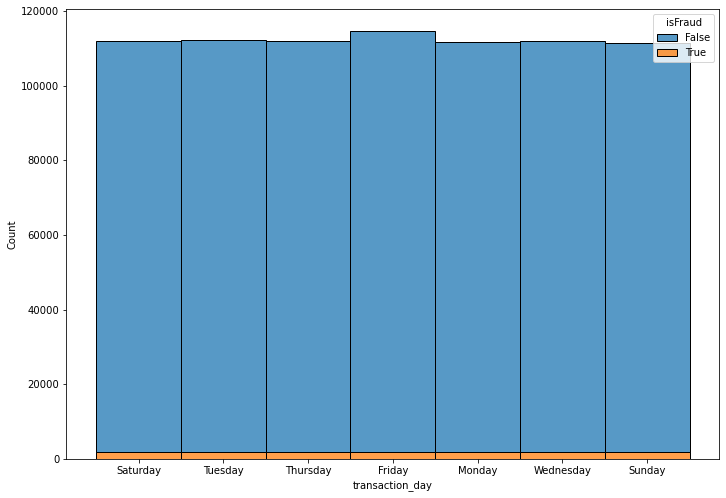

In [227]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.histplot(binwidth=0.5, x="transaction_day", hue="isFraud", data=df_time, stat="count", multiple="stack");

l = df_time['transaction_day'].unique()
for i in l: 
    print (i)
    print(df_time[df_time['transaction_day'] == i]['isFraud'].value_counts()) 
    print('\n##################\n')

14
False    32345
True       527
Name: isFraud, dtype: int64

##################

5
False    32389
True       496
Name: isFraud, dtype: int64

##################

9
False    32022
True       529
Name: isFraud, dtype: int64

##################

2
False    31897
True       492
Name: isFraud, dtype: int64

##################

21
False    32028
True       538
Name: isFraud, dtype: int64

##################

16
False    32469
True       487
Name: isFraud, dtype: int64

##################

0
False    32340
True       514
Name: isFraud, dtype: int64

##################

1
False    32286
True       482
Name: isFraud, dtype: int64

##################

10
False    32398
True       517
Name: isFraud, dtype: int64

##################

20
False    32378
True       485
Name: isFraud, dtype: int64

##################

18
False    32452
True       531
Name: isFraud, dtype: int64

##################

6
False    31836
True       513
Name: isFraud, dtype: int64

##################

11
False    32188
True

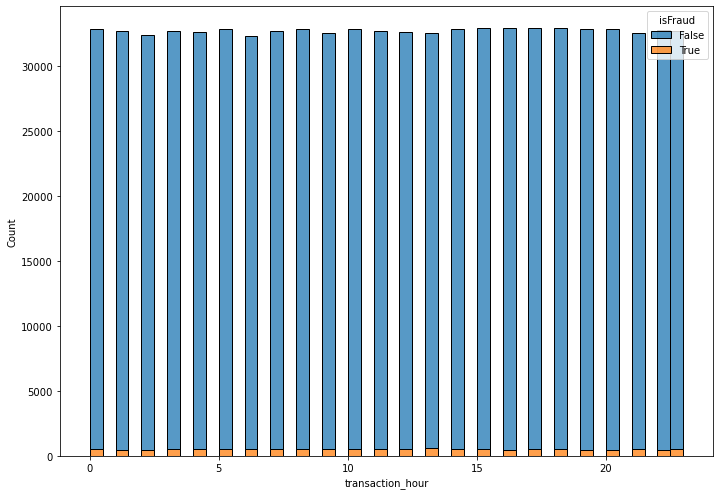

In [228]:
l = df_time['transaction_hour'].unique()
for i in l: 
    print (i)
    print(df_time[df_time['transaction_hour'] == i]['isFraud'].value_counts()) 
    print('\n##################\n')

    
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.histplot(binwidth=0.5, x="transaction_hour", hue="isFraud", data=df_time, stat="count", multiple="stack");

### as we can observe there is no relationship between (day of the week, hour) and fraud happened. And hence we can drop the columns as it will nake no difference.

In [229]:
df_transactions.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [230]:
# converting the columns in to date time
cols = ['accountOpenDate','dateOfLastAddressChange']
df_transactions[cols] = df_transactions[cols].apply(pd.to_datetime, errors='coerce')

# adding a column to find the difference in times of address change and account open date
df_transactions['diff_days'] = df_transactions['dateOfLastAddressChange'] - df_transactions['accountOpenDate']
df_transactions['diff_days'] = df_transactions['diff_days']/np.timedelta64(1,'D')

In [231]:
# dropping the irrelevant columns 
df_transactions.drop(['transactionDateTime','dateOfLastAddressChange','accountOpenDate'],axis=1,inplace = True)

In [232]:
df_transactions.head()

,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,diff_days
0,737265056,5000.0,5000.0,98.55,Uber,US,US,02,01,rideshare,06/2023,414,414,1803,PURCHASE,0.0,False,False,False,0.0
1,737265056,5000.0,5000.0,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,486,486,767,PURCHASE,0.0,True,False,False,0.0
2,737265056,5000.0,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,486,486,767,PURCHASE,0.0,False,False,False,0.0
3,737265056,5000.0,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,486,486,767,PURCHASE,0.0,False,False,False,0.0
4,830329091,5000.0,5000.0,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,885,885,3143,PURCHASE,0.0,True,False,False,0.0


In [234]:
# checking for number of unique values
for i in df_transactions.columns:
    print ('the number of unique values in   %s       is %d   and  dtype = %s' %(i,(len(df_transactions[i].unique())),(df_transactions[i].dtype)))

the number of unique values in   customerId       is 5000   and  dtype = int32
the number of unique values in   creditLimit       is 10   and  dtype = float64
the number of unique values in   availableMoney       is 521916   and  dtype = float64
the number of unique values in   transactionAmount       is 66038   and  dtype = float64
the number of unique values in   merchantName       is 2490   and  dtype = object
the number of unique values in   acqCountry       is 5   and  dtype = object
the number of unique values in   merchantCountryCode       is 5   and  dtype = object
the number of unique values in   posEntryMode       is 6   and  dtype = object
the number of unique values in   posConditionCode       is 4   and  dtype = object
the number of unique values in   merchantCategoryCode       is 19   and  dtype = object
the number of unique values in   currentExpDate       is 165   and  dtype = object
the number of unique values in   cardCVV       is 899   and  dtype = int32
the number o

In [235]:
# checking if missing values contribute to the fraud cases
for col in ['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch']:
    # creating list of unique values in a column
    print('\n##################\n')
    l = df_transactions[col].unique()
    for i in l: # executing for loop if the column has a null('') value
        print ('col = %s, entry = %s'%(col,str(i))) #print column  name
        print(df_transactions[df_transactions[col] == i]['isFraud'].value_counts()) # print number of counts fraud vs non fraud
        print('\n___________________\n')


##################

col = acqCountry, entry = US
False    762587
True      12122
Name: isFraud, dtype: int64

___________________

col = acqCountry, entry = 
False    4413
True      149
Name: isFraud, dtype: int64

___________________

col = acqCountry, entry = CAN
False    2369
True       55
Name: isFraud, dtype: int64

___________________

col = acqCountry, entry = MEX
False    3066
True       64
Name: isFraud, dtype: int64

___________________

col = acqCountry, entry = PR
False    1511
True       27
Name: isFraud, dtype: int64

___________________


##################

col = merchantCountryCode, entry = US
False    766323
True      12188
Name: isFraud, dtype: int64

___________________

col = merchantCountryCode, entry = CAN
False    2370
True       56
Name: isFraud, dtype: int64

___________________

col = merchantCountryCode, entry = 
False    642
True      82
Name: isFraud, dtype: int64

___________________

col = merchantCountryCode, entry = PR
False    1532
True       27
Name